Step 1 :: Importing the important Libraries

In [2]:

# 1. Pandas : To access the dataframe and work with dataframe properties.
import pandas as pd
# 2. numpy : Python library hels accesss the mathematical functions ,etc.
import numpy as np
# 3. matplotlib : build upon the numpy module helps to plot various graphs
import matplotlib.pyplot as plt 
# 4. tensorflow : important module which helps to work with image data set also has keras to use layering properties
import tensorflow as tf
from tensorflow import keras
from keras import layers
from  keras import Sequential

Step 2 :: Access and PreProcess the data

In [3]:
#our data is in the form of folders ,in order to accesss the images using tensorfolw function we need folders path ,and that is done here
data_train_path =r'C:\Users\DHANSHRI\Desktop\salesforce\do\DL-Project\train'
data_test_path=r'C:\Users\DHANSHRI\Desktop\salesforce\do\DL-Project\test'
data_val_path=r'C:\Users\DHANSHRI\Desktop\salesforce\do\DL-Project\validation'

In [4]:
#defining the height and width to make size of images uniform
img_width=180
img_height=180

In [5]:
#using tensorflow properties to convert images from folder to an array 
data_train= tf.keras.utils.image_dataset_from_directory(
    data_train_path,#path of folder
    shuffle=True,#its wike random state 
    image_size=(img_width,img_height),#image dimensions 
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [6]:
#cross verify the columns 
data_cat=data_train.class_names

In [7]:
data_val= tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False #we alreay have validation data set hence no need to split it again
)

Found 351 files belonging to 36 classes.


In [8]:
data_test= tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


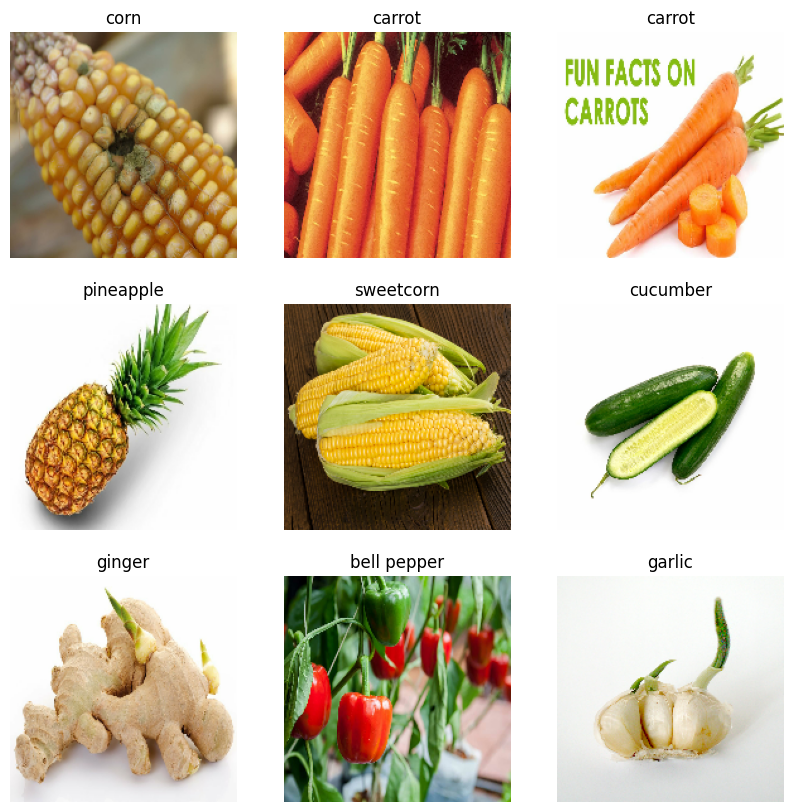

In [9]:
plt.figure(figsize=(10,10))
for image ,lables in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)#formation of grid  3*3 image matrix
        plt.imshow(image[i].numpy().astype('uint8'))#imshow helps to display images
        plt.title(data_cat[lables[i]])#fetching the titles from previously form lables list
        plt.axis('off')#hides the axix

Step 3 ::  Creating The Model 

In [10]:
data_train
#in the "<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>" 180 is height pixcels  180 is width pixcels and 3 suggests the Red Green Blue format of imgae

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model= Sequential([
    layers.Rescaling(1./255),#getting color in the specified range
    layers.Conv2D(16,3,padding='same',activation='relu'),
    #will convert the (180,180,3)in single ,16 is number of neyrons in a layer
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))



])  

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
epochs_size=10
history= model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/10




98/98 [==============================] - 54s 514ms/step - loss: 3.2126 - accuracy: 0.1326 - val_loss: 2.1750 - val_accuracy: 0.3618
Epoch 2/10
98/98 [==============================] - 46s 458ms/step - loss: 2.3129 - accuracy: 0.3400 - val_loss: 1.5529 - val_accuracy: 0.5128
Epoch 3/10
98/98 [==============================] - 39s 379ms/step - loss: 1.9127 - accuracy: 0.4369 - val_loss: 1.0617 - val_accuracy: 0.7066
Epoch 4/10
98/98 [==============================] - 38s 377ms/step - loss: 1.4669 - accuracy: 0.5753 - val_loss: 0.6449 - val_accuracy: 0.8376
Epoch 5/10
98/98 [==============================] - 38s 371ms/step - loss: 0.9662 - accuracy: 0.7194 - val_loss: 0.4096 - val_accuracy: 0.8917
Epoch 6/10
98/98 [==============================] - 38s 372ms/step - loss: 0.5816 - accuracy: 0.8315 - val_loss: 0.4418 - val_accuracy: 0.8832
Epoch 7/10
98/98 [==============================] - 39s 383ms/step - loss: 0.3814 - accuracy: 0.8902 - val_loss: 0.3460 - val_accuracy: 0.9316
Epoch 8/

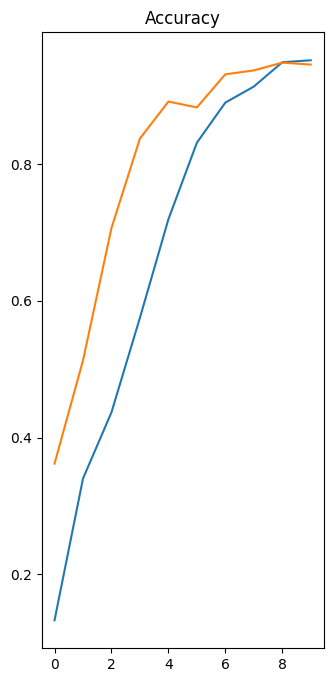

Text(0.5, 1.0, 'Loss')

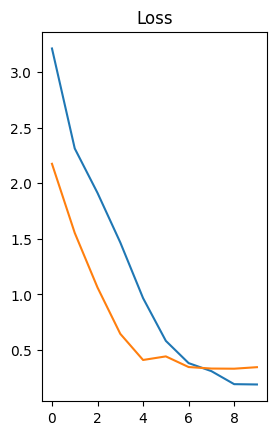

In [14]:
epochs_range =range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.show()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')



In [15]:
image = 'banana.jpg.jpg'
image =tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [16]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 151ms/step


In [17]:
score=tf.nn.softmax(predict)

In [18]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is banana with accuracy of 99.97
